In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
columns = ['encoded_class','sepal_length','sepal_width','petal_length','petal_width']

# Encode Class Labels to integers
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
le

LabelEncoder()

In [3]:
df = pd.read_csv('iris_all.csv')
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
le.transform(df['class'])[-5:]

array([2, 2, 2, 2, 2])

In [6]:
# Convert Classes to numeric value
df['encoded_class'] = le.transform(df['class'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,encoded_class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


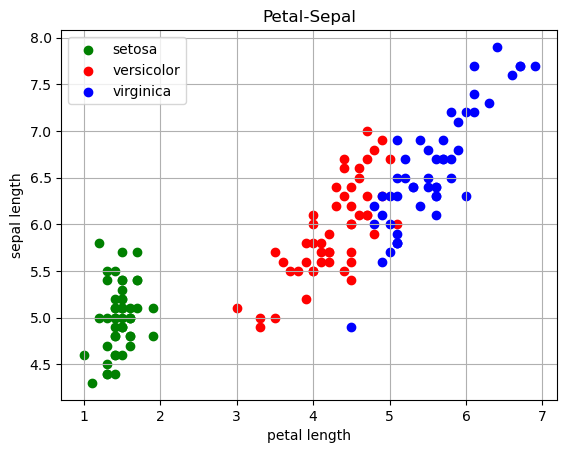

In [8]:
# Visualize
setosa = df['class'] == 'Iris-setosa'
versicolor = df['class'] == 'Iris-versicolor'
virginica = df['class'] == 'Iris-virginica'

plt.scatter(df[setosa].petal_length,y=df[setosa].sepal_length, label='setosa',color='g')
plt.scatter(df[versicolor].petal_length,y=df[versicolor].sepal_length, label='versicolor',color='r')
plt.scatter(df[virginica].petal_length,y=df[virginica].sepal_length, label='virginica',color='b')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.title('Petal-Sepal')
plt.grid(True)
plt.legend()
plt.show()

### Training and Validation Set

In [9]:
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

rows = df.shape[0]
train = int(.7 * rows)
test = rows-train

In [10]:
rows, train, test

(150, 105, 45)

In [11]:
# Write Training Set
df[:train].to_csv('iris_train.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [12]:
# Write Validation Set
df[train:].to_csv('iris_validation.csv'
                          ,index=False,header=False
                          ,columns=columns)

In [13]:
# Write Column List
with open('iris_train_column_list.txt','w') as f:
    f.write(','.join(columns))